# Visualization of WAV file
In this notebook, we extract bytes from wav file and experiment with different ways to visualize the data, including more traditional plot of signal and other methods such as rectangles of different colors and shapes.

## 1. Audio Data Extraction 

In [24]:
file_name = "../FMP_1/data/C1/FMP_C1_F10_Beethoven_Fifth-MM1-20_Karajan1946.wav"

Read audio and display it with sound 

In [25]:
import numpy as np
import librosa
import IPython

IPython.display.Audio(file_name)

Read audio as byte stream and remove metadata to get the data trunk

In [26]:
file = open(file_name, 'rb')
content = file.read()
content_str = content.hex()

content_str[:32]

'5249464616570e0057415645666d7420'

In [27]:
meta_size = 46
data = content[meta_size:]

ls = [int.from_bytes(data[i:i+2], "little", signed="true") for i in range(0, len(data), 2)]
print(ls[:100])
print(len(ls))

[43, 48, 41, 35, 33, 39, 37, 29, 35, 30, 17, 26, 24, 25, 17, 17, 27, 27, 34, 21, 27, 20, 7, 22, 11, 2, -3, 0, 1, -4, -4, -5, -4, -5, 0, 8, 3, -8, -1, -6, -11, -2, -4, 11, 5, 4, 3, -12, 3, 8, 16, 19, 6, 17, 21, 25, 29, 27, 38, 29, 18, 18, 25, 30, 27, 32, 30, 26, 26, 29, 31, 18, 18, 23, 19, 18, 20, 21, 26, 22, 29, 28, 25, 39, 34, 29, 25, 18, 28, 34, 26, 14, 15, 21, 23, 32, 43, 42, 41, 24]
469880


## 2. Visualization of WAV data

### 2.1 Visualize as time varied signal

To visualize the wav data, we can first plot them against time and reconstruct the music signal

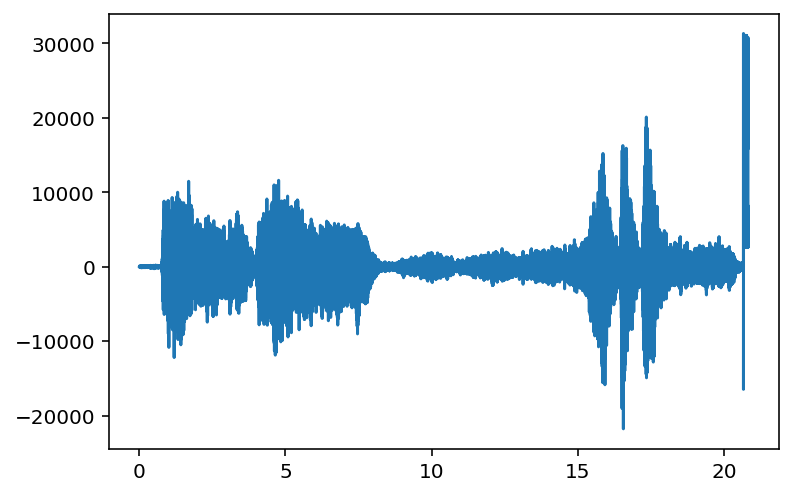

In [28]:
import matplotlib.pyplot as plt

Fs = 22560
t = np.arange(len(ls)) / Fs

plt.plot(t,ls)

### 2.2 Visualize as RGB value

To visualize the wave data with different colors, we first need a function that maps wav data to rgb values

In [29]:
def data_to_rgb(val):
    # Map (-32768, 32767) in wav data to rgb (0,255)
    
    val = abs(val)*4 % 255
    return val

Then we can experiment with different combinations of rgb values and different shape/arrangement of rectangles to create different visualizations

[43, 48, 41, 35, 33, 39, 37, 29, 35, 30, 17, 26, 24, 25, 17, 17, 27, 27, 34, 21, 27, 20, 7, 22, 11, 2, -3, 0, 1, -4, -4, -5, -4, -5, 0, 8, 3, -8, -1, -6, -11, -2, -4, 11, 5, 4, 3, -12, 3, 8, 16, 19, 6, 17, 21, 25, 29, 27, 38, 29, 18, 18, 25, 30, 27, 32, 30, 26, 26, 29, 31, 18, 18, 23, 19, 18, 20, 21, 26, 22, 29, 28, 25, 39, 34, 29, 25, 18, 28, 34, 26, 14, 15, 21, 23, 32, 43, 42, 41, 24]


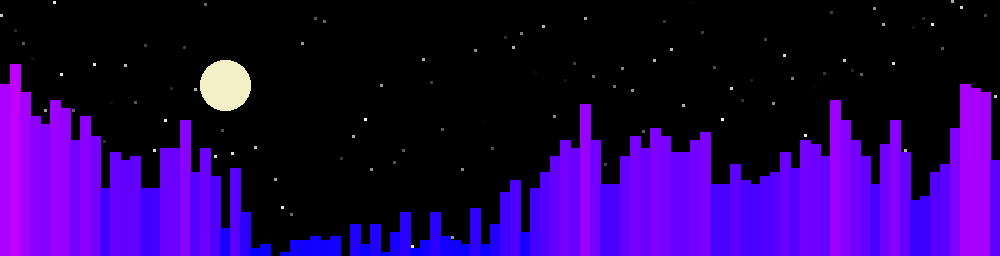

In [30]:
from PIL import Image, ImageDraw
from IPython.display import display
import random

rgb_ls = [data_to_rgb(x) for x in ls]
color_arr = [(x, 0, 255) for x in rgb_ls]

w, h = 1000, 256
img = Image.new("RGB", (w, h)) 
x0, y0, x1, y1 = 0, 0, 10, 256

for i in range(100):
    img1 = ImageDraw.Draw(img)
    y0 = 256-rgb_ls[i]
    coor = [(x0, y0), (x1, y1)]

    img1.rectangle(coor, fill = color_arr[i])
    
    d = 2
    ran_y = random.random() * y0 - d
    ran_x = random.random() * (x1-x0)/2 + x0
    color = random.randint(0,255)

    # Adding stars to the image of "skylines"
    img1.ellipse((ran_x,ran_y,ran_x+d,ran_y+d),fill=(color,color,color))

    x0 = x0 + 10
    x1 = x1 + 10

# Adding the moon to the image
img1.ellipse((200,60,250,110),fill=(244,241,201))
    
print(ls[:100])
display(img)

Above is only a small portion of the WAV data, what if we encode all data pixel by pixel?

469880


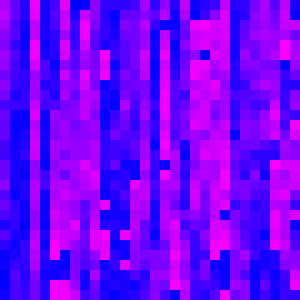

In [8]:
rgb_ls = [data_to_rgb(x) for x in ls]
color_arr = [(x, 0, 255) for x in rgb_ls]

# To display full data, we recommend square_w = 685, canvas_w = 685, unit_w = 1
square_w = 685
canvas_w, canvas_h = 685, 685
unit_w = 10

img = Image.new("RGB", (canvas_w, canvas_h)) 

for i in range(square_w):
    for j in range(square_w):
        img1 = ImageDraw.Draw(img)
        coor = [(i*unit_w, j*unit_w), (i*unit_w+unit_w, j*unit_w+unit_w)]
        
        index = i * square_w + j

        img1.rectangle(coor, fill = color_arr[index])  


print(len(ls))
display(img)

### 2.3 Visualize as HSL value

One thing to point out is that the mapping function between WAV data and RGB/HSL value makes a huge difference in visualization. It is crucial to come up with a function that displays the lower values with enough distinctions, for example, 43 and 28 should be colors that can be distinguished by human eyes. Also it should be able to capture the difference between the higher values and the lower values, for example 13723 and 43 should be drastically different colors.

In [35]:
def data_to_hsl(x):
    # Map (-32768, 32767) in wav data to hsl (0,360)
    
#     val = int((1. / (1. + np.exp(-x)) if x >= 0 else (np.exp(x) / (1. + np.exp(x)))) * 360 )
    val = abs(x)*4 % 360
    
    return val

The graph below makes sense because it captures the periodic nature of the signal by the length of rectangle and the color change. If we look at a signal closely, it should appears like a periodic waveform, just as in this graph.

[43, 48, 41, 35, 33, 39, 37, 29, 35, 30, 17, 26, 24, 25, 17, 17, 27, 27, 34, 21, 27, 20, 7, 22, 11, 2, -3, 0, 1, -4, -4, -5, -4, -5, 0, 8, 3, -8, -1, -6, -11, -2, -4, 11, 5, 4, 3, -12, 3, 8, 16, 19, 6, 17, 21, 25, 29, 27, 38, 29, 18, 18, 25, 30, 27, 32, 30, 26, 26, 29, 31, 18, 18, 23, 19, 18, 20, 21, 26, 22, 29, 28, 25, 39, 34, 29, 25, 18, 28, 34, 26, 14, 15, 21, 23, 32, 43, 42, 41, 24]


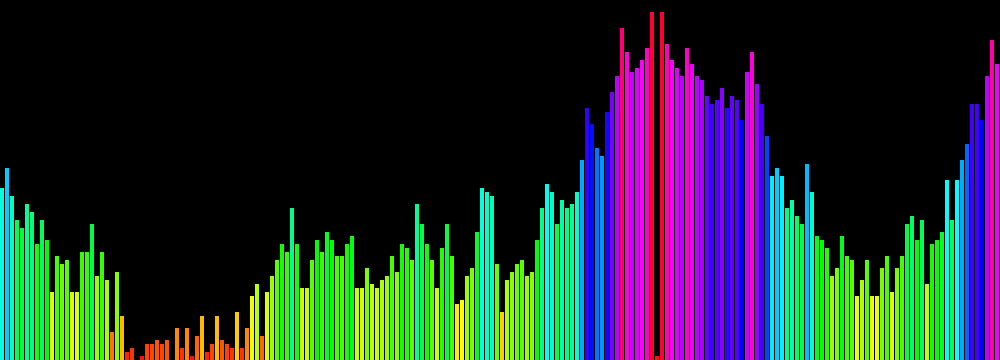

In [10]:
hsl_ls = [data_to_hsl(x) for x in ls]

w, h = 1000, 360
img = Image.new("RGB", (w, h)) 
x0, y0, x1, y1 = 0, 0, 3, 360
size = 200

for i in range(size):
    img1 = ImageDraw.Draw(img)
    y0 = 360-hsl_ls[i]
    coor = [(x0, y0), (x1, y1)]
    color = "hsl({},{}%,{}%)".format(hsl_ls[i],100,50)

    img1.rectangle(coor, fill = color)
    
    x0 = x0 + w/size
    x1 = x1 + w/size
    
print(ls[:100])
display(img)

If we try to encode all data, and set the width of rectangle to 0 (as a line). This time we don't need to concern about the lower value and can simply apply a linear mapping from (-32768, 32767) to (0, 360). We ended up with (half) the reconstructed signal again (because we take absolute value), except with color changing acccording to the amplitude of the signal. 

Below is the comparison between our visualization of rectangles & HSL and the plotted signal. Notice the graph above is only a very small portions of the graph below, about 0.0085 seconds of music file.

469880


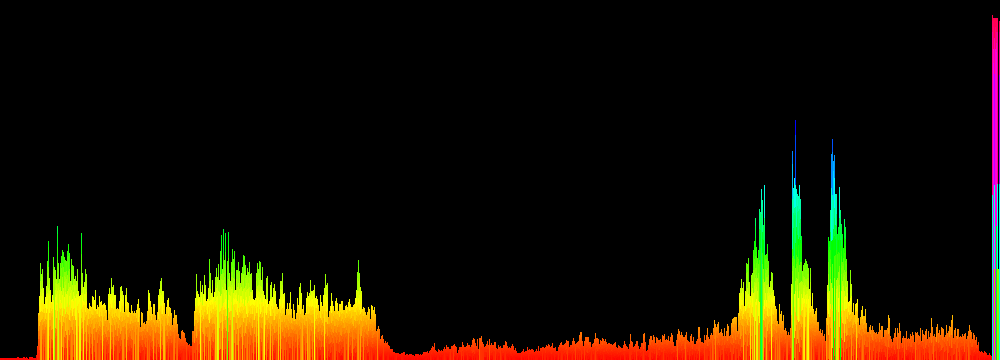

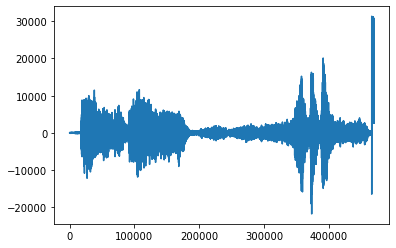

In [11]:
hsl_ls = [abs(x) / 32767 * 360 for x in ls]
plt.plot(ls)

w, h = 1000, 360
img = Image.new("RGB", (w, h)) 
x0, y0, x1, y1 = 0, 0, 0, 360
size = 469880

for i in range(size):
    img1 = ImageDraw.Draw(img)
    y0 = 360-hsl_ls[i]
    coor = [(x0, y0), (x1, y1)]
    color = "hsl({},{}%,{}%)".format(hsl_ls[i],100,50)
    
    img1.rectangle(coor, fill = color)
    
    x0 = x0 + w/size
    x1 = x1 + w/size
    
print(len(ls))
display(img)

Or we could also break the array of colors into several rows and do it as a grid of small squares.

[43, 48, 41, 35, 33, 39, 37, 29, 35, 30, 17, 26, 24, 25, 17, 17, 27, 27, 34, 21, 27, 20, 7, 22, 11, 2, -3, 0, 1, -4, -4, -5, -4, -5, 0, 8, 3, -8, -1, -6, -11, -2, -4, 11, 5, 4, 3, -12, 3, 8, 16, 19, 6, 17, 21, 25, 29, 27, 38, 29, 18, 18, 25, 30, 27, 32, 30, 26, 26, 29, 31, 18, 18, 23, 19, 18, 20, 21, 26, 22, 29, 28, 25, 39, 34, 29, 25, 18, 28, 34, 26, 14, 15, 21, 23, 32, 43, 42, 41, 24]


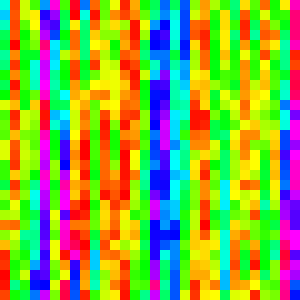

In [12]:
hsl_ls = [data_to_hsl(x) for x in ls]

# To display full data, we recommend square_w = 685, canvas_w = 685, unit_w = 1
square_w = 30
canvas_w, canvas_h = 300, 300
unit_w = 10

img = Image.new("RGB", (canvas_w, canvas_h)) 

for i in range(square_w):
    for j in range(square_w):
        img1 = ImageDraw.Draw(img)
        coor = [(i*unit_w, j*unit_w), (i*unit_w+unit_w, j*unit_w+unit_w)]

        index = i * square_w + j
        color = "hsl({},{}%,{}%)".format(hsl_ls[index],100,50)
        
        img1.rectangle(coor, fill = color)  


print(ls[:100])
display(img)

One reason that the grid doesn't work because it doesn't preserve enough local features/continuity. I am inspired to use Hilbert Curve as a way to fill the 2d space with 1d array of colored pixels.

This still doesn't end well because there are simply too many data to encode to pixel. Besides, the data is sampled from a signal so it makes more sense to line them up vertically. 

The observations above point to that it's unrealistic to visualize all music data bytes by bytes, as pixels or lines and expect a pattern of the entire music from it. Because the music file contains much more data than a picture, both in terms of range of amplitude and time as it takes 22560 samples per seconds (Fs = 22560 in this case). 

In other words, I can't come up with ways that both capture the nuance of the difference in bytes that's distinguishable by human eyes and the pattern contained in the vast of music data without losing information. There has to be higher level features such as melody if we try to see a broader picture of the music or using compression techniques and sacrificing the nuance in byte differences.

Before we move on to higher level features, we can try to explore other ways to compress the data for purpose of visualization yet still preserve quality as much as possible. One way is to look at Short time Fourier transform and look at the frequency domain.

### 2.4 Visualize compressed data in mp3

Would it be better for visualization if we can compress the WAV data say 10 times? Then we would encode fewer information in one picture and have them more distinguisbale by human eyes. 

Luckily, someone already did it for us. It's called MP3. MP3 applies compression techniques to WAV file and obtains a file 10 times smaller. It achieves so by removing portions of the original signal considered to be essentially inaudible — a technique know as "perceptual coding." 

MP3 compression first takes in raw digital audio signal (PCM), which is the WAV data without WAV header. Then it applies Fourier transform and split music into frequency bands. Then it applies psycho-acoustic model to compute the significance of each band for the human perception of the sound (the human ear can only discern sounds from 20Hz to 20KHz) and applies another MDCT filter. Then it quantifies and encodes each sample and output the bitstream formatted as a mp3 frame. Let's try to visualize music in MP3 format.

In [31]:
mp3_file_name = "../FMP_1/data/C1/FMP_C1_F10_Beethoven_Fifth-MM1-20_Karajan1946.mp3"
IPython.display.Audio(mp3_file_name)

We can first remove the metadata (ID3, Xing info) and retrive the bytes representing mp3 frame.

In [32]:
mp3_f = open(mp3_file_name, "rb")
mp3_content = mp3_f.read()

mp3_metasize = 7982
mp3_data = mp3_content[mp3_metasize:]

# From header of each frame, we know this file is MPEG Version 2 Layer III without CRC protection with bitrate = 48 kbps
# The sampling frequency is 22050 Hz and the channel mode is single channel

frames = mp3_data.split(b'\xff\xf3\x60\xc0')[1:]
raw_data = b''.join(frames)
# print(raw_data)

mp3_ls = [int.from_bytes(raw_data[i:i+2], "little", signed="true") for i in range(0, len(raw_data), 2)]
# ls = []
# for j in range(len(frames)):
#     for i in range(0, len(frames[j]), 2):
#         ls.append(int.from_bytes(frames[j][i:i+2], "big", signed="true"))
#         print(frames[j][i:i+2])
        
print((mp3_ls[:100]))


[5888, -26080, 22086, 18018, 17484, 9365, -19160, 18253, 16902, 27683, -28889, 10386, 12564, 28004, 6312, -22386, 10370, -15931, 20744, -8695, 10274, 769, -15888, -15362, 2457, -1600, -22719, 8223, 8784, 12822, 12608, 20636, -7725, -17531, 12180, -13595, 31083, -18100, -20671, -1985, -5361, 16511, 16764, 32568, -18437, -18400, 1552, -455, 25986, -18421, 249, 1204, 177, 7431, 134, 1024, -20567, -5545, 14032, -9148, -25985, -32029, 19370, 13541, -22121, 25922, -31420, 24872, 819, -15862, 11013, -18656, -28398, -31729, -15654, 3374, 6184, 30216, -29607, -31039, -7096, 28352, 24026, -14427, 13021, -20264, -17932, 28182, -10912, 8409, 18967, 11188, 23854, 17131, 2251, 20828, -16661, -1115, 16302, 13401]


Then we try to visualize data represented in each mp3 frame. 

61776


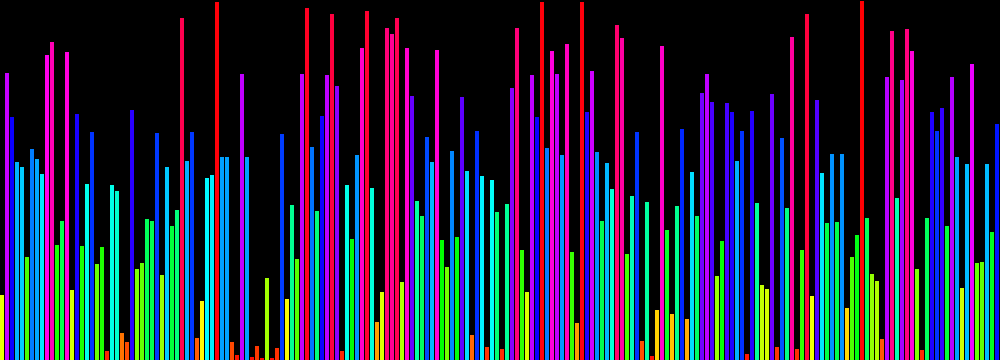

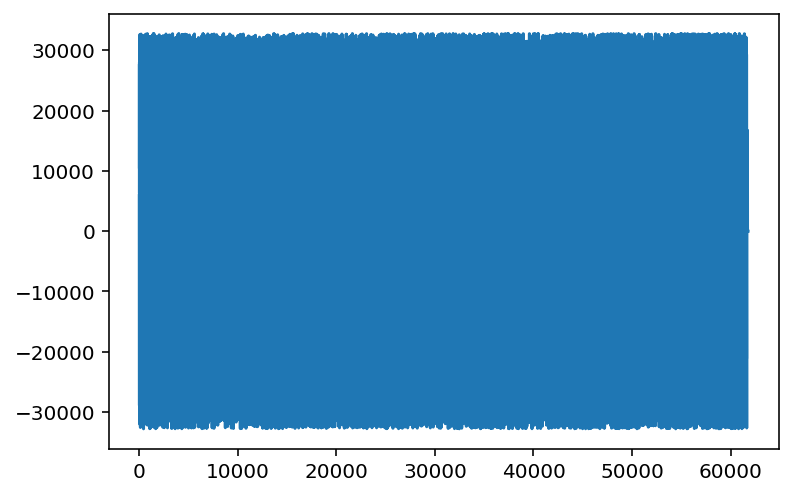

In [33]:
hsl_ls = [abs(x) / 32767 * 360 for x in mp3_ls]
plt.plot(mp3_ls)

w, h = 1000, 360
img = Image.new("RGB", (w, h)) 
x0, y0, x1, y1 = 0, 0, 3, 360
size = 200

for i in range(size):
    img1 = ImageDraw.Draw(img)
    y0 = 360-hsl_ls[i]
    coor = [(x0, y0), (x1, y1)]
    color = "hsl({},{}%,{}%)".format(hsl_ls[i],100,50)
    
    img1.rectangle(coor, fill = color)
    
    x0 = x0 + w/size
    x1 = x1 + w/size
    
print(len(mp3_ls))
display(img)

61776
[43, 48, 41, 35, 33, 39, 37, 29, 35, 30, 17, 26, 24, 25, 17, 17, 27, 27, 34, 21, 27, 20, 7, 22, 11, 2, -3, 0, 1, -4, -4, -5, -4, -5, 0, 8, 3, -8, -1, -6, -11, -2, -4, 11, 5, 4, 3, -12, 3, 8, 16, 19, 6, 17, 21, 25, 29, 27, 38, 29, 18, 18, 25, 30, 27, 32, 30, 26, 26, 29, 31, 18, 18, 23, 19, 18, 20, 21, 26, 22, 29, 28, 25, 39, 34, 29, 25, 18, 28, 34, 26, 14, 15, 21, 23, 32, 43, 42, 41, 24]


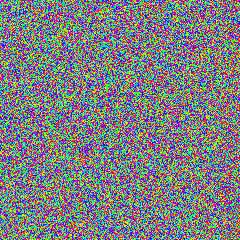

In [43]:
# hsl_ls = [data_to_hsl(x) for x in ls]

# To display full data, we recommend square_w = 685, canvas_w = 685, unit_w = 1
square_w = 240
canvas_w, canvas_h = 240, 240
unit_w = 1

img = Image.new("RGB", (canvas_w, canvas_h)) 
print(len(hsl_ls))
for i in range(square_w):
    for j in range(square_w):
        img1 = ImageDraw.Draw(img)
        coor = [(i*unit_w, j*unit_w), (i*unit_w+unit_w, j*unit_w+unit_w)]

        index = i * square_w + j

        color = "hsl({},{}%,{}%)".format(hsl_ls[index],100,50)
        
        img1.rectangle(coor, fill = color)  


print(ls[:100])
display(img)

The graph above visualizing encoded data of MP3 doesn't quite make sense. 

For comparison purpose, we can decode mp3 file and visualize it again by plotting it against time. Notice this looks just like the reconstructed signal from the wav file. Because that's what raw data is, samples of the amplitude of the signal.

467712


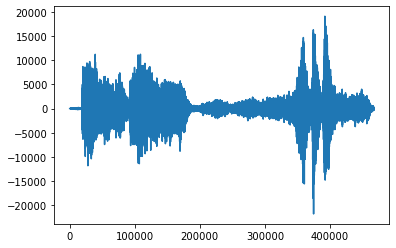

In [96]:
from pydub import AudioSegment

sound = AudioSegment.from_mp3(mp3_file_name)

raw_data = sound._data

mp3_ls = [int.from_bytes(raw_data[i:i+2], "little", signed="true") for i in range(0, len(raw_data), 2)]

print(len(mp3_ls))

plt.plot(mp3_ls)

The MP3 compression doesn't quite work because the compression techniques used in MP3 disturbs the original pattern in the raw music file. If we visualize the file directly, it would have no meaning. If we visualize mp3 after decoding it, it is the same as wav file (the music signal) again.

### 2.5 Visualize data with Fourier Transform

Since we already read the bytes in WAV file, we can directly apply Fourier Transform and change it to frequency domain.

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


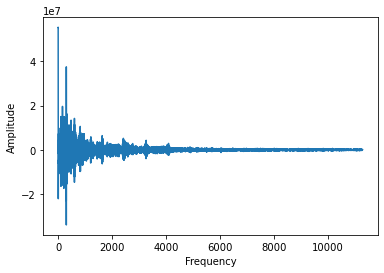

In [18]:
Fs = 22560
amplitude = ls
n = len(amplitude)

yf = np.fft.rfft(amplitude)
fstep = Fs / n
freqs = np.arange(len(yf)) * fstep

plt.plot(freqs, yf)

plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.show()

We can also convert it back to time domain without losing information. The reconstructed signal looks just the same.

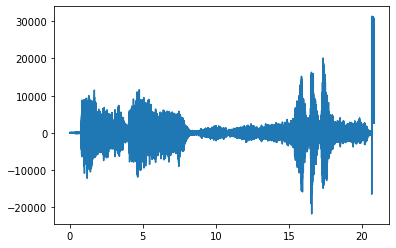

In [19]:
re_amplitude = np.fft.irfft(yf)
t = np.arange(len(re_amplitude)) / Fs

plt.plot(t,re_amplitude)

### 2.6 Extract Music from visualization

We first visualize the wav data. It looks in this special way because I tried to encode as much data as possible. 

If we use width = 1000 as before, we can only encode 1000 samples from data, 1 sample for each pixel, which is far less enough to reconstruct the signal. Here we choose width = 10000

We also change the mapping function between HSL values and WAV data. Because the original function takes absolute value of data and it's not one-to-one mapping. Therefore, it cannot be transformed back. We use another linear mapping instead, which doesn't look as nice.

469880


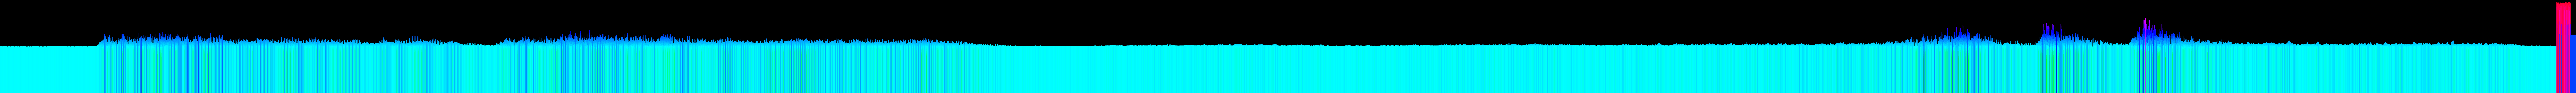

In [162]:
hsl_ls = [(x+32768) / (32767+32768) * 360 for x in ls]
# hsl_ls = [abs(x) / 32767 * 360 for x in ls]

# Normal size w = 1000
w, h = 10000, 360
img = Image.new("RGB", (w, h)) 
x0, y0, x1, y1 = 0, 0, 1, 360
size = 469880

for i in range(size):
    img1 = ImageDraw.Draw(img)
    y0 = 360-hsl_ls[i]
    coor = [(x0, y0), (x1, y1)]
    color = "hsl({},{}%,{}%)".format(hsl_ls[i],100,50)
    
    img1.rectangle(coor, fill = color)
    
    x0 = x0 + w/size
    x1 = x1 + w/size
    
print(len(ls))
display(img)

We then scan the entire picture as pixels and load RGB values for each pixels. We only take the pixel of the last row to represent the color of the rectangle. 

In [166]:
pixels = img.load()

hls_array = np.empty(shape=(img.height, img.width, 3), dtype=float)
rgb_arr = []

for row in range(0, img.height):
    for column in range(0, img.width):
        
        rgb = pixels[column, row]
        hls = colorsys.rgb_to_hls(rgb[0]/255, rgb[1]/255, rgb[2]/255)
        
        rgb_arr.append(rgb)
        hls_array[row, column, 0] = hls[0] * 360
        hls_array[row, column, 1] = hls[1] * 100
        hls_array[row, column, 2] = hls[2] * 100


rgb_ls = [colorsys.hls_to_rgb(x/360,0.5,1) for x in hsl_ls]
rgb_ls = [(int(x[0]*255), int(x[1]*255), int(x[2]*255)) for x in rgb_ls]

print("RGB array from picture:  ", rgb_arr[-5:])
print("RGB array from data:  ", rgb_ls[-5:])
print()
print("HLS array from picture:  ",hls_array[359][:,0][-5:])
print("HLS array from data:  ",hsl_ls[-5:])

RGB array from picture:   [(0, 63, 255), (0, 63, 255), (0, 63, 255), (0, 63, 255), (117, 0, 255)]
RGB array from data:   [(255, 0, 160), (255, 0, 164), (0, 50, 255), (0, 49, 255), (117, 0, 255)]

HLS array from picture:   [225.17647059 225.17647059 225.17647059 225.17647059 267.52941176]
HLS array from data:   [322.2119478141451, 321.2341496910048, 228.15106431677728, 228.4696726939803, 267.5376516365301]


Then we reverse our encoding algorithm and convert HSL array into array of reconstructed data. We plot original data and reconstructed data for comparison.

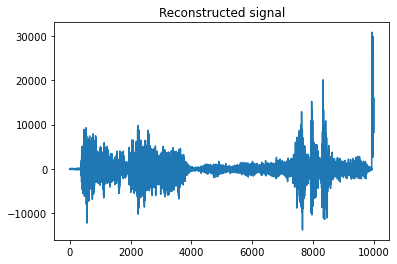

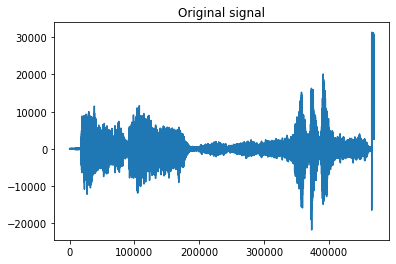

In [164]:
h_ls = hls_array[359][:,0]
x_ls = [x / 360 * (32767+32768) - 32768 for x in h_ls]

plt.plot(x_ls)
plt.title("Reconstructed signal")
plt.show()

plt.plot(ls)
plt.title("Original signal")
plt.show()

Now we have the reconstructed data ready, we can transform it into a signal and write it into the WAV file. 

We first collect necessary information from the original WAV file for reference. For exmaple, the channel number, the samplewidth (byte per sample)

In [137]:
import wave, struct

o_signal = wave.open("../FMP_1/data/C1/FMP_C1_F10_Beethoven_Fifth-MM1-20_Karajan1946.wav", "r")
sampleWidth = o_signal.getsampwidth()
channel = o_signal.getnchannels()
fs = o_signal.getframerate()

print(sampleWidth, channel, fs)

2 1 22050


We then set the parameters to the new WAV file and write data as frames into new WAV file.

One thing to point out is that we also apply resampling because again, even 10000 samples is too small to reconstruct the original music file. So we need to resample it to make sure it has the same sample size as the original file.

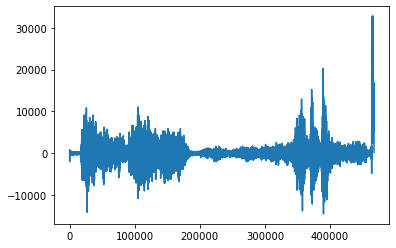

32767 -14481.029881045857
30796.666666666664 -13707.166666666664


In [143]:
from scipy import signal

duration = 21211 / 1000
sampleRate = fs
sample_size = int(sampleRate*duration)

resampled_signal = signal.resample(x_ls, sample_size)
resampled_signal = [32767 if x > 32767 else x for x in resampled_signal]

plt.plot(resampled_signal)
plt.show()


r_signal = wave.open("remake.wav","w")

r_signal.setparams((channel, sampleWidth, sampleRate, 0, 'NONE', 'not compressed'))

for i in range(len(resampled_signal)):
    data = struct.pack('h', int(resampled_signal[i]))
    r_signal.writeframesraw(data)

r_signal.close()

IPython.display.Audio("remake.wav")

We can hear the basic melody from the reconstructed WAV file. However, it is very dull and undistinguishable. I suppose it has to do with resampling process where we made up so many data that's not found in the reconstructed signal. Those information has already been lost when we visualize it. 

### 2.7 Midi Visualization

In [8]:
midi_file_name = "../FMP_1/data/C1/FMP_C1_F10_Beethoven_Fifth-MM1-20_Sibelius-Orchestra-Fast.mid"

In [23]:
# from music21 import converter,instrument
import music21.midi as midi

# file = converter.parse(midi_file_name)

# events = []

# for event in file.recurse():
#     events.append(event)

mf = midi.MidiFile()
mf.open(midi_path)
mf.read()
mf.close()

NameError: name 'midi_path' is not defined